In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures  
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler


In [2]:
df = pd.read_csv('C:/college/machine learning/classical ml/projects/pro_1/co2_emissions_kt_by_country.csv')

In [3]:
df

,country_code,country_name,year,value
0,ABW,Aruba,1960,11092.675000
1,ABW,Aruba,1961,11576.719000
2,ABW,Aruba,1962,12713.489000
3,ABW,Aruba,1963,12178.107000
4,ABW,Aruba,1964,11840.743000
...,...,...,...,...
13948,ZWE,Zimbabwe,2015,12430.000305
13949,ZWE,Zimbabwe,2016,11020.000458
13950,ZWE,Zimbabwe,2017,10340.000153
13951,ZWE,Zimbabwe,2018,12380.000114


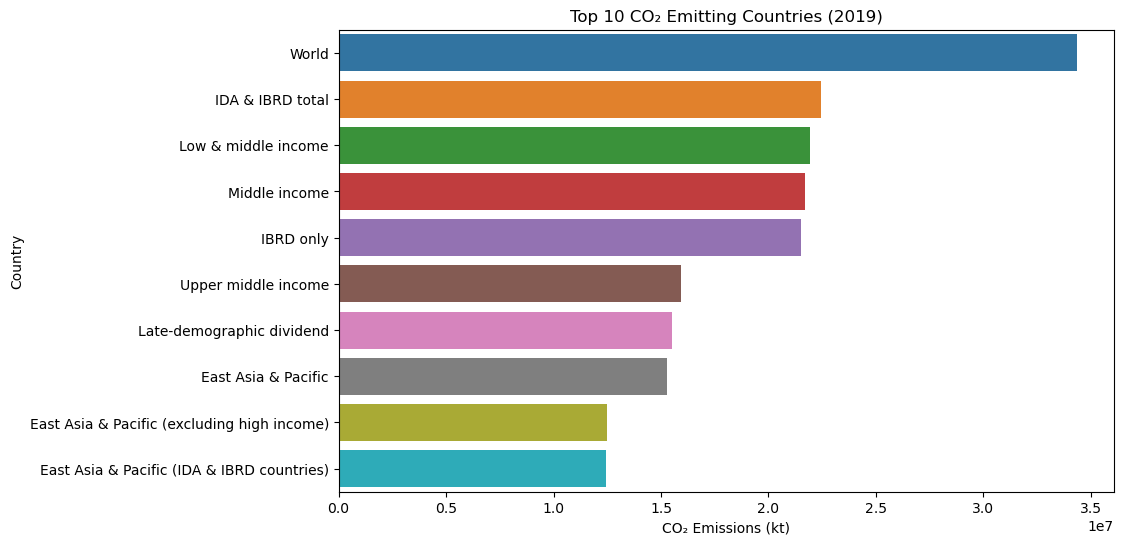

In [4]:
latest = df[df['year'] == df['year'].max()]
top_10= latest.sort_values('value', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='value', y='country_name', data=top_10)
plt.title('Top 10 CO₂ Emitting Countries (2019)')
plt.xlabel('CO₂ Emissions (kt)')
plt.ylabel('Country')
plt.show()



In [5]:
print(df.isnull().sum())
df.duplicated().sum()


country_code    0
country_name    0
year            0
value           0
dtype: int64


0

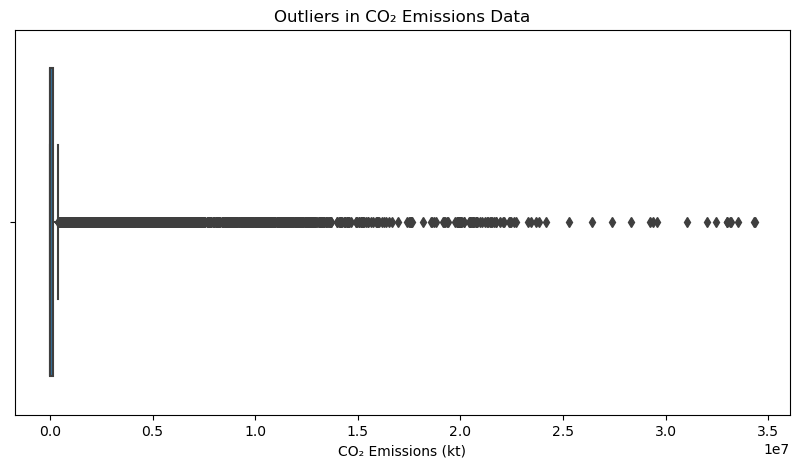

In [6]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['value'])
plt.title('Outliers in CO₂ Emissions Data')
plt.xlabel('CO₂ Emissions (kt)')
plt.show()

In [7]:
Q1 = df['value'].quantile(0.25)
Q3 = df['value'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['value'] >= Q1 - 1.5*IQR) & (df['value'] <= Q3 + 1.5*IQR)]


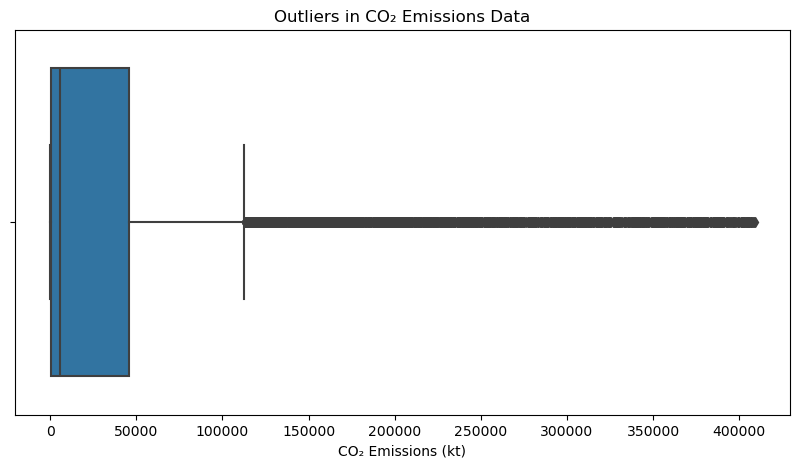

In [8]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['value'])
plt.title('Outliers in CO₂ Emissions Data')
plt.xlabel('CO₂ Emissions (kt)')
plt.show()

In [9]:
encoder = OneHotEncoder()
country_encoded = encoder.fit_transform(df[['country_code']]).toarray()
encoded_df = pd.DataFrame(country_encoded, columns=encoder.get_feature_names_out(['country_code']))
df = pd.concat([df.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)
df.drop(['country_name', 'country_code'], axis=1, inplace=True)



In [10]:
scaler = MinMaxScaler()
df[['year', 'value']] = scaler.fit_transform(df[['year', 'value']])


In [11]:
df.head()

,year,value,country_code_ABW,country_code_AFE,country_code_AFG,country_code_AFW,country_code_AGO,country_code_ALB,country_code_AND,country_code_ARB,...,country_code_VEN,country_code_VGB,country_code_VNM,country_code_VUT,country_code_WSM,country_code_XKX,country_code_YEM,country_code_ZAF,country_code_ZMB,country_code_ZWE
0,0.000000,0.027320,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.016949,0.028503,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.033898,0.031283,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.050847,0.029973,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.067797,0.029149,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
X = df.drop('value', axis=1)
y = df['value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [33]:
print("R²:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("accuracy:", model.score(X_test, y_test))


R²: 0.8442012875262381
MSE: 0.006625897630597982
accuracy: 0.8442012875262381


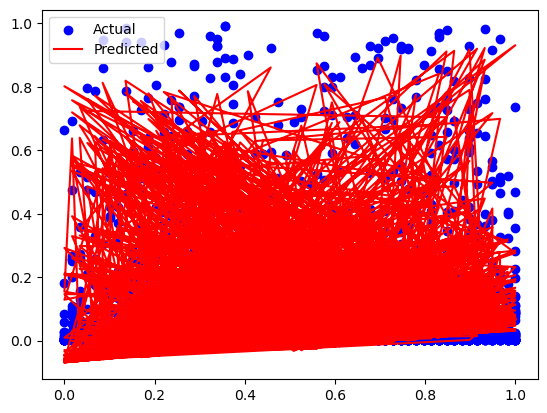

In [15]:
plt.scatter(X_test['year'], y_test, color='blue', label='Actual')
plt.plot(X_test['year'], y_pred, color='red', label='Predicted')
plt.legend()
plt.show()

In [16]:
model = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),  
    ('linreg', LinearRegression())
])

In [17]:
X_P_train, X_P_test, y_P_train, y_P_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_P_train, y_P_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('linreg', LinearRegression())])

In [18]:
y_P_pred = model.predict(X_P_test)
print("Polynomial Regression R²:", r2_score(y_P_test, y_P_pred))
print("Polynomial Regression MSE:", mean_squared_error(y_P_test, y_P_pred))
print("Polynomial Regression accuracy:", model.score(X_P_test, y_P_test))

Polynomial Regression R²: 0.9746451744796834
Polynomial Regression MSE: 0.0010783046642159119
Polynomial Regression accuracy: 0.9746451744796834


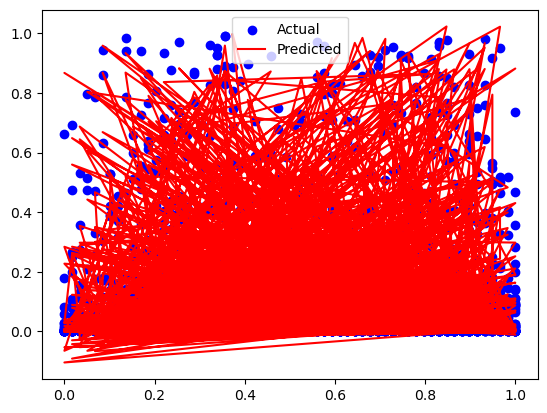

In [20]:
plt.scatter(X_P_test['year'], y_P_test, color='blue', label='Actual')
plt.plot(X_P_test['year'], y_P_pred, color='red', label='Predicted')
plt.legend()
plt.show()